In [2]:
from numpy import load
import pickle

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
train_X = load('/content/drive/My Drive/Dataset-FakeNews/train_X.npy')
train_X_new = load('/content/drive/My Drive/Dataset-FakeNews/train_X_new.npy')
train_Y = load('/content/drive/My Drive/Dataset-FakeNews/train_Y.npy')
val_X = load('/content/drive/My Drive/Dataset-FakeNews/val_X.npy')
val_X_new = load('/content/drive/My Drive/Dataset-FakeNews/val_X_new.npy')
val_Y = load('/content/drive/My Drive/Dataset-FakeNews/val_Y.npy')

print(train_X.shape)
print(train_X_new.shape)
print(train_Y.shape)
print(val_X.shape)
print(val_X_new.shape)
print(val_Y.shape)

(6420, 300)
(6420, 307)
(6420,)
(2140, 300)
(2140, 307)
(2140,)


In [12]:
print(train_X_new[0][0])

0.07375335693359375


In [7]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

def plotCM(cMatrix, N,label = []):
  df_cm = pd.DataFrame(cMatrix, range(N),range(N))
#plt.figure(figsize = (8,8))
  plt.figure(figsize = (10,7))  
  cmap = sn.cm.rocket_r
  if label:
    sn.heatmap(df_cm.round(2), annot=True,fmt='g',cmap = cmap, xticklabels = label, yticklabels=label)
  else:
    sn.heatmap(df_cm.round(2), annot=True,fmt='g',cmap = cmap, )


In [20]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(max_iter=200).fit(train_X, train_Y,)

In [21]:
print("Train Accuracy = ", reg.score(train_X, train_Y))
print("Val Accuracy = ", reg.score(val_X, val_Y))
filename = '/content/drive/My Drive/AAAI CONSTRAINT/Fake News/W2V-LR.pickle'
pickle.dump(reg, open(filename, 'wb'))

Train Accuracy =  0.9098130841121496
Val Accuracy =  0.9042056074766355


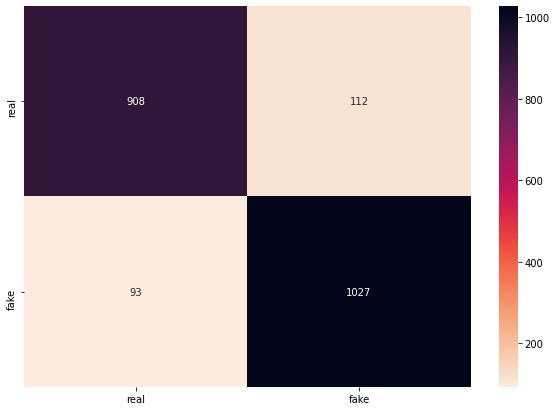

In [ ]:
pred = reg.predict(val_X)
N = 2 # num_classes
confMatrix = [ [0 for y in range(N)] for x in range(N)]

for x,y in zip(val_Y,pred):
  confMatrix[x][y] += 1

plotCM(confMatrix,N,['real','fake'])

In [ ]:
from sklearn.metrics import classification_report
y_true = val_Y
y_pred = pred
target_names = ['Real','Fake']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Real       0.91      0.89      0.90      1020
        Fake       0.90      0.92      0.91      1120

    accuracy                           0.90      2140
   macro avg       0.90      0.90      0.90      2140
weighted avg       0.90      0.90      0.90      2140



In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(train_X, train_Y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
print("Train Accuracy = ",clf.score(train_X,train_Y))
print("Val Accuracy = ", clf.score(val_X,val_Y))

filename = '/content/drive/My Drive/AAAI CONSTRAINT/Fake News/W2V-SVM.pickle'
pickle.dump(clf, open(filename, 'wb'))

Train Accuracy =  0.9716510903426792
Val Accuracy =  0.9271028037383178


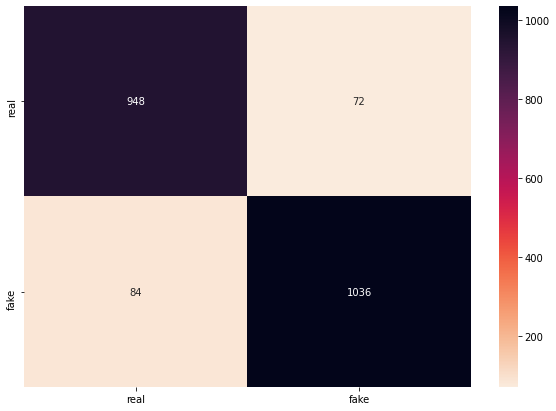

In [ ]:
pred = clf.predict(val_X)
N = 2 # num_classes
confMatrix = [ [0 for y in range(N)] for x in range(N)]

for x,y in zip(val_Y,pred):
  confMatrix[x][y] += 1

plotCM(confMatrix,N,['real','fake'])

arr = []

for i in range(len(pred)):
  if pred[i] != val_Y[i]:
    arr.append(i)

In [ ]:
from sklearn.metrics import classification_report
y_true = val_Y
y_pred = pred
target_names = ['Real','Fake']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Real       0.92      0.93      0.92      1020
        Fake       0.94      0.93      0.93      1120

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140



In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=11, random_state=1, n_estimators=100)
clf.fit(train_X, train_Y)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
print("Train Accuracy = ",clf.score(train_X,train_Y))
print("Val Accuracy = ", clf.score(val_X,val_Y))

filename = '/content/drive/My Drive/AAAI CONSTRAINT/Fake News/W2V-RF.pickle'
pickle.dump(clf, open(filename, 'wb'))

Train Accuracy =  0.9909657320872274
Val Accuracy =  0.9004672897196262


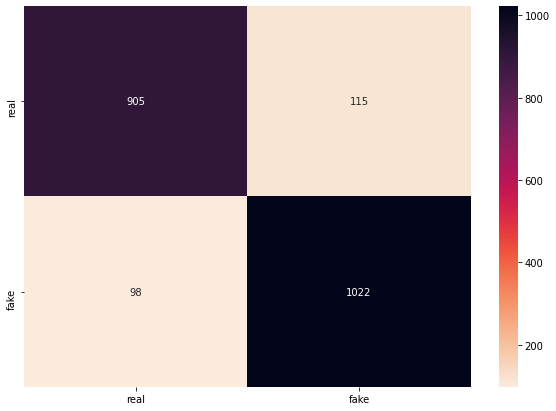

In [ ]:
pred = clf.predict(val_X)
N = 2 # num_classes
confMatrix = [ [0 for y in range(N)] for x in range(N)]

for x,y in zip(val_Y,pred):
  confMatrix[x][y] += 1

plotCM(confMatrix,N,['real','fake'])

In [ ]:
from sklearn.metrics import classification_report
y_true = val_Y
y_pred = pred
target_names = ['Real','Fake']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Real       0.90      0.89      0.89      1020
        Fake       0.90      0.91      0.91      1120

    accuracy                           0.90      2140
   macro avg       0.90      0.90      0.90      2140
weighted avg       0.90      0.90      0.90      2140



In [ ]:
train_path = '/content/drive/My Drive/AAAI CONSTRAINT/Fake News/Constraint_English_Train - Sheet1.csv'
val_path = '/content/drive/My Drive/AAAI CONSTRAINT/Fake News/Constraint_English_Val - Sheet1.csv'

In [ ]:
val_df = pd.read_csv(val_path)
val_df.head()

,id,tweet,label
0,1,Chinese converting to Islam after realising th...,fake
1,2,11 out of 13 people (from the Diamond Princess...,fake
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake
3,4,Mike Pence in RNC speech praises Donald Trump’...,fake
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,real


In [ ]:
mis = []
for x in arr:
  mis.append((val_df['label'][x],val_df['tweet'][x]))
print(arr)
for x in mis:
  print(x[0], [x[1]])

[13, 25, 28, 40, 57, 61, 73, 100, 138, 148, 153, 173, 175, 202, 223, 270, 291, 293, 295, 301, 309, 310, 356, 374, 377, 403, 438, 453, 458, 468, 488, 496, 531, 543, 548, 591, 594, 609, 613, 639, 661, 670, 676, 703, 717, 722, 724, 734, 738, 757, 763, 769, 791, 806, 827, 838, 852, 859, 886, 888, 898, 899, 920, 946, 956, 978, 993, 1002, 1018, 1020, 1047, 1051, 1061, 1063, 1073, 1088, 1099, 1129, 1152, 1158, 1185, 1191, 1213, 1218, 1242, 1243, 1249, 1255, 1263, 1288, 1312, 1317, 1356, 1375, 1382, 1395, 1400, 1417, 1435, 1440, 1448, 1507, 1511, 1518, 1531, 1540, 1542, 1573, 1582, 1586, 1591, 1627, 1628, 1685, 1727, 1735, 1739, 1757, 1761, 1769, 1772, 1790, 1795, 1799, 1820, 1842, 1848, 1866, 1870, 1896, 1899, 1905, 1916, 1922, 1925, 1930, 1936, 1937, 1942, 1945, 1966, 1979, 2004, 2017, 2018, 2034, 2042, 2043, 2048, 2051, 2089, 2090, 2103, 2104, 2135, 2138]
real ['Tomorrow April 6 we will pass 10000 coronavirus deaths. We passed 5000 on April 2. We passed 1000 on March 26. We passed 100 on Ma

Many Tweets had URLs, on inspection -

* images or videos attached came as url on opening it takes you to the tweet
* many tweets had 2 urls, 1 had tweet image/video other had an article outside twitter(news,blog etc)
* In a lot of cases truth of tweet is determined by the url example fake - 57, 28, real - 67    

Also among the misclassified tweets i decided to search with keywords. Searching for Virus found 3 misclassified all are real classified as fake. There are other similar keywords mainly breath, cough, symptoms along with covid.  
When searching for similar tweets in the dataset i found lot of fake tweets talking about breath test which had similar keywords. Where as, lot of real tweets had the keyword mask in it. combination of these words without context is causing the issue.  